# 🧠 Brain Tumor Classification - MobileNetV2
# Author: Lincoln Dibler | Model: MobileNetV2 | Purpose: Train and evaluate CNN with modular pipeline


# 1.) Imports

In [7]:
BASE_DIR = '/content/drive/MyDrive/BrainTumorClassification'
TRAIN_DIR = f'{BASE_DIR}/data/Training'
TEST_DIR = f'{BASE_DIR}/data/Testing'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import sys
sys.path.append('/content/drive/MyDrive/BrainTumorClassification')

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from utils import count_images_per_class, plot_random_images_per_class, create_generators
from models import build_mobilenet_model, train_model
from evaluation import ModelEvaluator, gradcam_samples_by_class
from utils import save_model_to_drive, load_model_from_drive



# 2.) Data Inspections

meningioma: 1339 images
glioma: 1321 images
notumor: 1595 images
pituitary: 1457 images


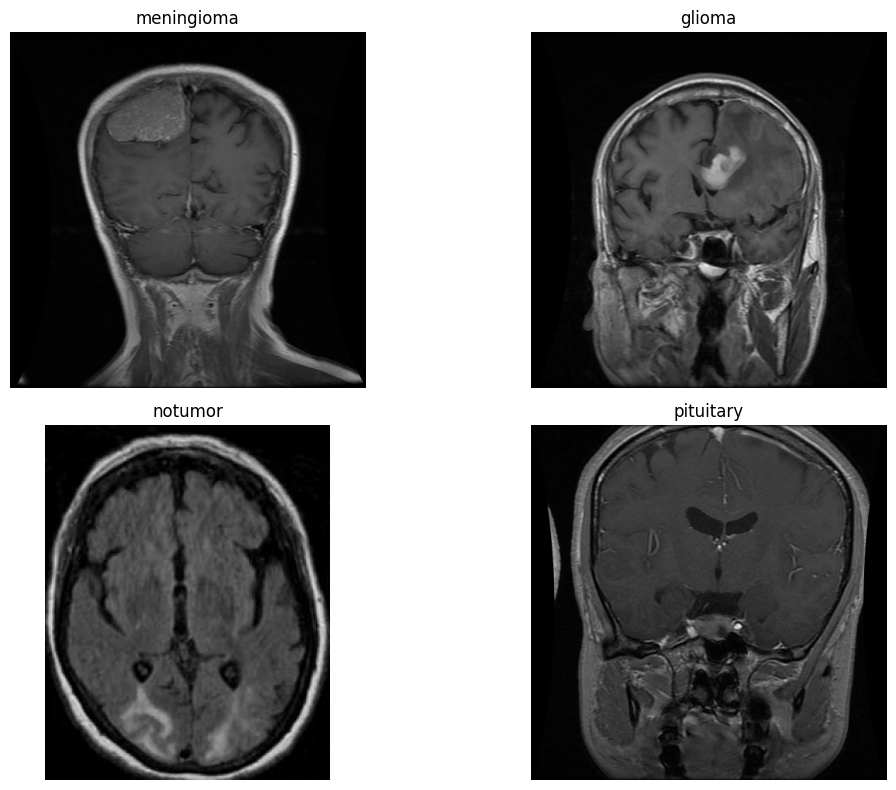

In [11]:
count_images_per_class(TRAIN_DIR)
plot_random_images_per_class(TRAIN_DIR)

# 3.) Generator Setup

In [12]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_gen, val_gen, test_gen = create_generators(
    train_dir= TRAIN_DIR,
    test_dir=TEST_DIR,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    preprocessing=preprocess_input
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# 4.) Build and Train Model

In [13]:
model = build_mobilenet_model(img_size=IMG_SIZE)
model, history = train_model(model, train_gen, val_gen, test_gen, epochs=EPOCHS)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 967s 7s/step - accuracy: 0.3097 - loss: 1.7754 - val_accuracy: 0.4014 - val_loss: 1.2854
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.5647 - loss: 1.0110 - val_accuracy: 0.5898 - val_loss: 1.0637
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.6907 - loss: 0.7658 - val_accuracy: 0.6521 - val_loss: 0.9398
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.7645 - loss: 0.6213 - val_accuracy: 0.6740 - val_loss: 0.8726
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.7833 - loss: 0.5822 - val_accuracy: 0.6968 - val_loss: 0.8301
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.8208 - loss: 0.5081 - val_accuracy: 0.7073 - val_loss: 0.7949
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.8339 - loss: 0.4683 - val_accuracy: 0.7125 - val_loss: 0.7696
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.8394 - loss: 0.4515 - val_accu

# 5.) Save Model

In [14]:
save_model_to_drive(model, model_name='mobilenet_model')

✅ Model saved to Drive at: /content/drive/MyDrive/BrainTumorClassification/saved_models/mobilenet_model.keras


# 6.) Evaluate Results

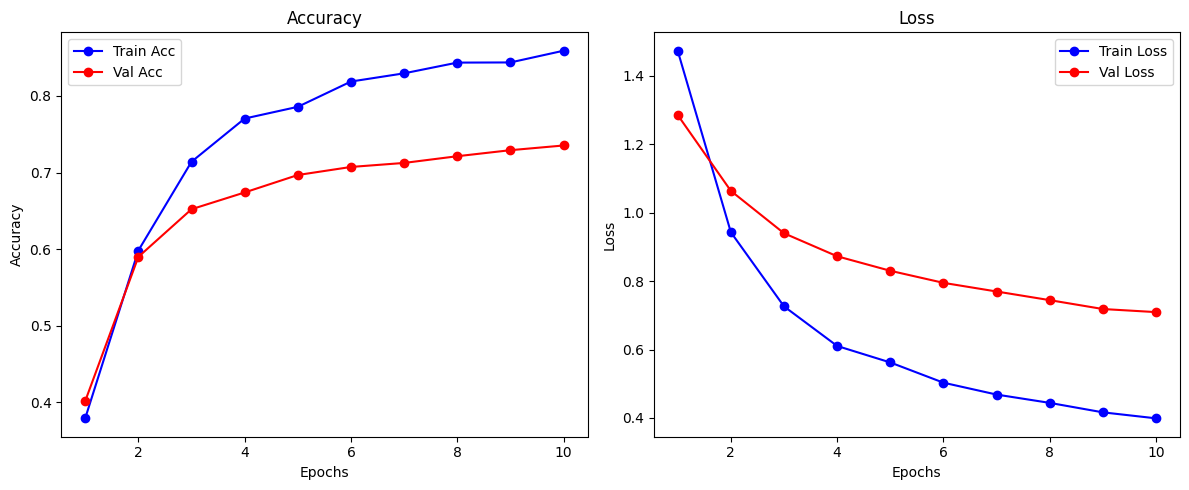

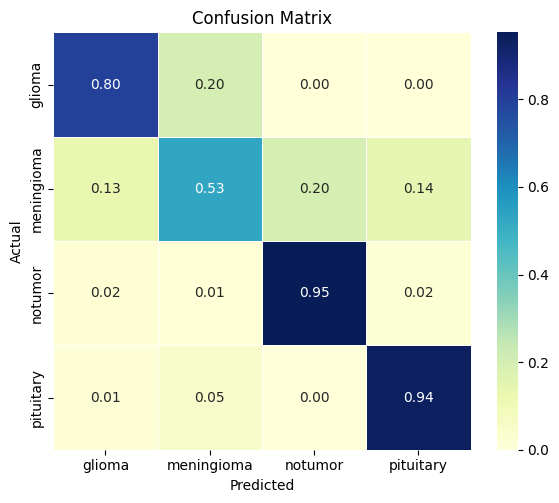

              precision    recall  f1-score   support

      glioma       0.82      0.80      0.81       300
  meningioma       0.68      0.53      0.59       306
     notumor       0.86      0.95      0.91       405
   pituitary       0.84      0.94      0.89       300

    accuracy                           0.81      1311
   macro avg       0.80      0.80      0.80      1311
weighted avg       0.81      0.81      0.81      1311



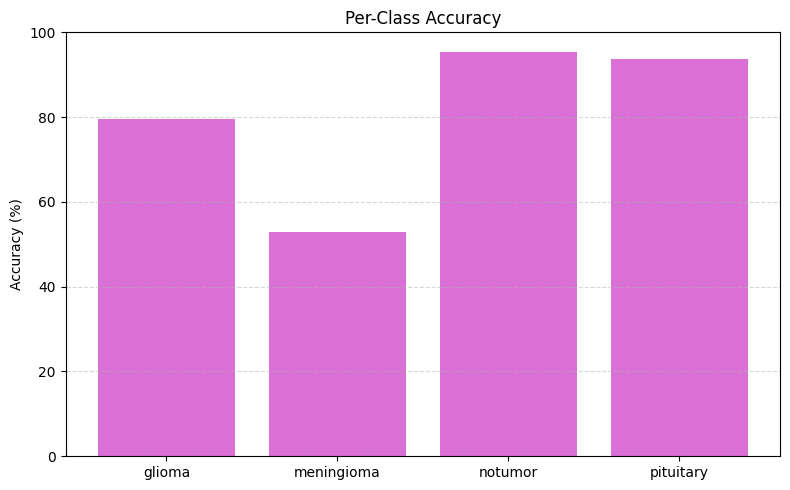

In [15]:
class_names = list(test_gen.class_indices.keys())

evaluator = ModelEvaluator(
    model=model,
    history=history,
    test_gen=test_gen,
    class_names=class_names,
    input_size=IMG_SIZE,
    preprocess_fn=None,
    last_conv_layer='Conv_1'
)

evaluator.plot_training_curves()
evaluator.plot_confusion_matrix()
evaluator.show_classification_report()
evaluator.plot_per_class_accuracy()


# 7.) Grad-Cam Sampling

In [18]:
gradcam_samples_by_class(evaluator, root_dir=TEST_DIR, max_examples=1)

Output hidden; open in https://colab.research.google.com to view.